<a href="https://colab.research.google.com/github/aida-wofford/Carmen/blob/main/Compare_obs_with_s99_v94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specific Objectives.

1) Obtain the redshift of a named target and use it to correct its COS spectra.

2) Resample the COS spectrum of a named target to match the number of points in the S99 wavelength arrays. 

3) Verify that objective 2) was done correctly.

# Resources.

### Definitions.

<b>Young Star Cluster (YSC)</b>. A star cluster of total mass in stars >= 1E4 Msun that contains O and B stars.

<b>Rectified Spectrum</b>. A rectified spectrum is one where the luminosity array 
 has been divided at each wavelength by the value of the continuum at that wavelength.
 For this definition, the continuum is the part of the spectrum that is free of spectral lines.

[Diffraction grating](https://www.khanacademy.org/science/physics/light-waves/interference-of-light-waves/v/diffraction-grating) 

[COS gratings](https://hst-docs.stsci.edu/cosihb/chapter-13-spectroscopic-reference-material/13-3-gratings)

### Python.

[spectres](https://spectres.readthedocs.io/en/latest/)

# Activity.

### Instructions.

This activity uses NGC 1512 as an example. Repeat steps for NGC 1566.

### Create S99 wavelength array to be used.

In [1]:
# Load relevant package
import numpy as np

#------------------------------------------------------------
# Path to s99 model.
#path = '/Users/aidawofford/My/Investigacion/HST/c26-2018/15627_Adamo_CLUES/Models/v94_z020_10Myr/'
path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

# Model filename.
model='v94_z020_10Myr.ifaspec1'

#------------------------------------------------------------
# First age available
t0 = .10000E+05

#------------------------------------------------------------
# Load model
data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

#------------------------------------------------------------
# Select portion of wavelength array corresponding to t0 and the range between 1150 and 1700 Angstroms.

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

### Install and load astroquery.

In [4]:
!pip install astroquery
from astroquery.ned import Ned

### Define function that uses astroquery to obtain redshift of targets.

In [5]:
def redshift(target):
  result_table = Ned.query_object(target)
  z = result_table['Redshift'][0]
  return z
# Example, NGC 1512

print('z=', redshift("NGC 1512"))

z= 0.002995


### Load numpy

In [ ]:
# Load numpy
import numpy as np

### Instal and load spectres

In [6]:
!pip install spectres
from spectres import spectres

### Define path to observations on github.

In [8]:
path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

### Define function to load and manipulate observations.

In [11]:
def fix_obs(galaxy, cluster):
  z=redshift(galaxy)
  x130 = np.genfromtxt(path+galaxy+'-'+cluster+'_G130M_normspec_wLya.dat', usecols=0) / (1 + z)
  y130 = np.genfromtxt(path+galaxy+'-'+cluster+'_G130M_normspec_wLya.dat', usecols=4)
  x160 = np.genfromtxt(path+galaxy+'-'+cluster+'_G160M_normspec_wLya.dat', usecols=0) / (1 + z)
  y160 = np.genfromtxt(path+galaxy+'-'+cluster+'_G160M_normspec_wLya.dat', usecols=4)
  return x130, y130, x160, y160
fix_obs('NGC-1512','YSC1')
print(min(x130))

NameError: ignored

### Load rectified COS spectra of YSCs 1 and 2, from all gratings, into wavelength and luminosity variables. Correct wavelength arrays for redshift.

In [ ]:


# Path to rectified spectrum of YSC # 1
#path='../Data/Spectra/NGC-1512-YSC1/'


# There are spectra obtained with gratings G130M and G160M for this YSC
grating=['NGC-1512-YSC1_G130M_normspec_wLya.dat','NGC-1512-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

# Path to rectified spectrum of YSC # 2
#path='../Data/Spectra/NGC-1512-YSC2/'
path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

# There are spectra obtained with gratings G130M and G160M for this YSC
grating=['NGC-1512-YSC2_G130M_normspec_wLya.dat','NGC-1512-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)

### Resample the observed spectra.

In [ ]:


# Use module.
y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



### Smooth the observed spectra.

In [ ]:
# Define smoothing function
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Define smoothing factor
sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

### Plot the results for YSC #1.

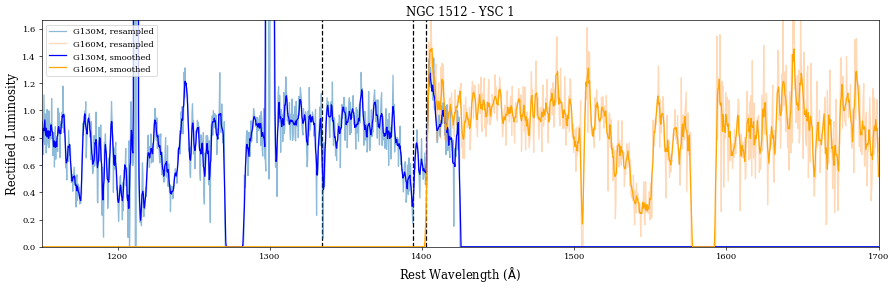

In [ ]:
# Load plotting packages and modules
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

# Plot in this notebook
%matplotlib inline

# Plot result for YSC1
fig, axes = plt.subplots(figsize=(18,5), dpi=60)

# Set plot title
plt.title('NGC 1512 - YSC 1', fontsize=size)

# Set limits of horizontal axis
plt.xlim(1150.,1700.)

# Set label of horizontal axis
plt.xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

# Set limits of vertical axis
good_x = np.where(x99 >= 1320) 
plt.ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))

# Set label of vertical axis
plt.ylabel('Rectified Luminosity', fontsize=size)

# Plot resampled, unsmoothed data
plt.plot(x99, y1_130, alpha=0.5, label='G130M, resampled')
plt.plot(x99, y1_160, alpha=0.3, label='G160M, resampled')

# Overlay resampled, smoothed data
plt.plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
plt.plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')

# Mark positions of lines of interest
plt.axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
plt.axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
plt.axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

# Add legend
plt.legend()

### Plot the results for YSC #2.

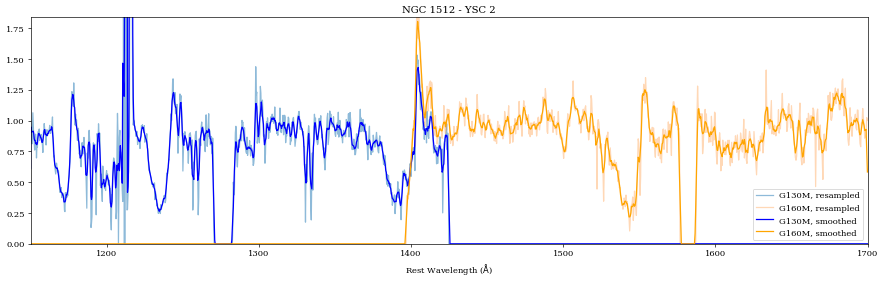

In [ ]:
# Load plotting packages and modules
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Plot in this notebook
%matplotlib inline

# Plot result for YSC1
fig, axes = plt.subplots(figsize=(18,5), dpi=60)

# Set plot title
plt.title('NGC 1512 - YSC 2')

# Set limits of horizontal axis
plt.xlim(1150.,1700.)

# Set label of horizontal axis
plt.xlabel(r'Rest Wavelength ($\rm{\AA}$)')

# Set limits of vertical axis
good_x = np.where(x99 >= 1320) 
plt.ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Plot resampled, unsmoothed data
plt.plot(x99, y2_130, alpha=0.5, label='G130M, resampled')
plt.plot(x99, y2_160, alpha=0.3, label='G160M, resampled')

# Overlay resampled, smoothed data
plt.plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
plt.plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Add legend
plt.legend()

z= 0.005017

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



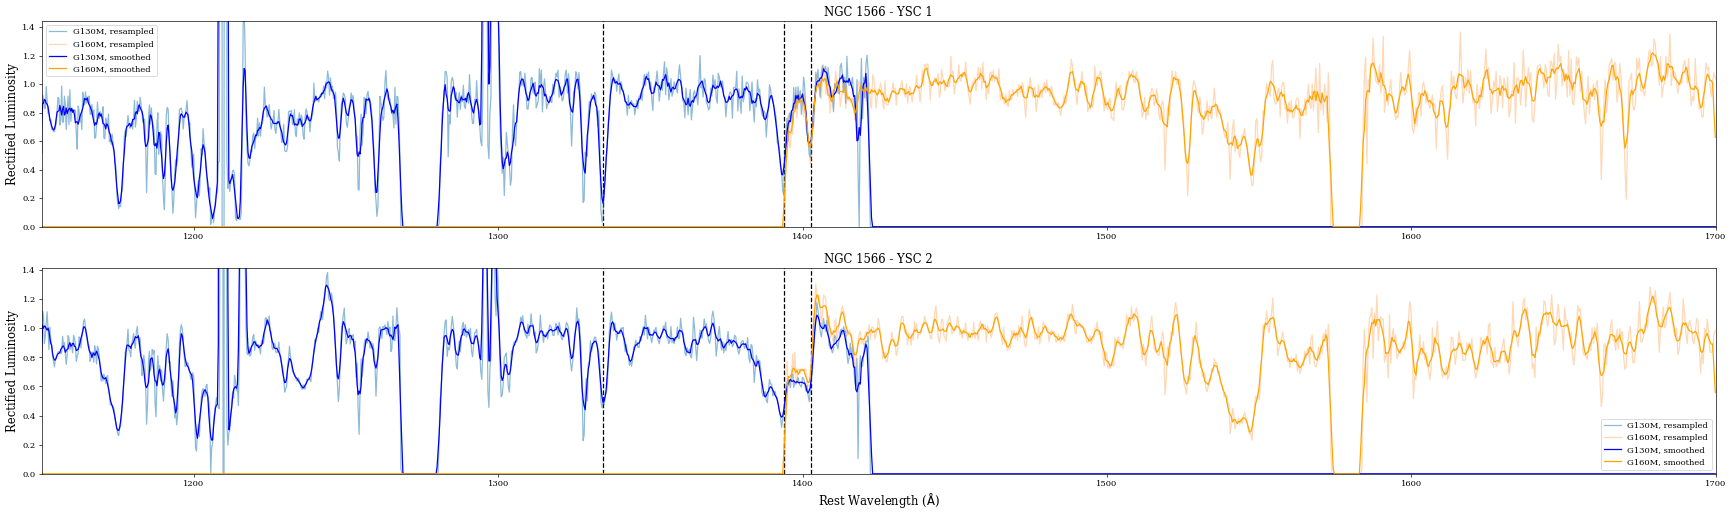

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.ned import Ned
from spectres import spectres
from matplotlib.pyplot import figure

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

model='v94_z020_10Myr.ifaspec1'

t0 = .10000E+05

data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

result_table = Ned.query_object("NGC 1566")
z = result_table['Redshift'][0]
print('z=', z)

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1566-YSC1_G130M_normspec_wLya.dat','NGC-1566-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

#path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1566-YSC2_G130M_normspec_wLya.dat','NGC-1566-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)


y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

%matplotlib inline

fig, axes = plt.subplots(2,figsize=(36,10), dpi=60)

axes[0].set_title('NGC 1566 - YSC 1', fontsize=size)
axes[1].set_title('NGC 1566 - YSC 2', fontsize=size)

axes[0].set_xlim(1150.,1700.)
axes[1].set_xlim(1150.,1700.)

axes[1].set_xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

good_x = np.where(x99 >= 1320) 
axes[0].set_ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))
axes[1].set_ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Set label of vertical axis
axes[0].set_ylabel('Rectified Luminosity', fontsize=size)
axes[1].set_ylabel('Rectified Luminosity', fontsize=size)

# Plot resampled, unsmoothed data
axes[0].plot(x99, y1_130, alpha=0.5, label='G130M, resampled')
axes[0].plot(x99, y1_160, alpha=0.3, label='G160M, resampled')
axes[1].plot(x99, y2_130, alpha=0.5, label='G130M, resampled')
axes[1].plot(x99, y2_160, alpha=0.3, label='G160M, resampled')

# Overlay resampled, smoothed data
axes[0].plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
axes[0].plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')
axes[1].plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
axes[1].plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Mark positions of lines of interest
axes[0].axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
axes[0].axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
axes[0].axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')
axes[1].axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
axes[1].axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
axes[1].axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

axes[0].legend()
axes[1].legend()

z= 0.005017

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:809: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a, v = array(a, copy=False, ndmin=1), array(v, copy=False, ndmin=1)


FileNotFoundError: ignored

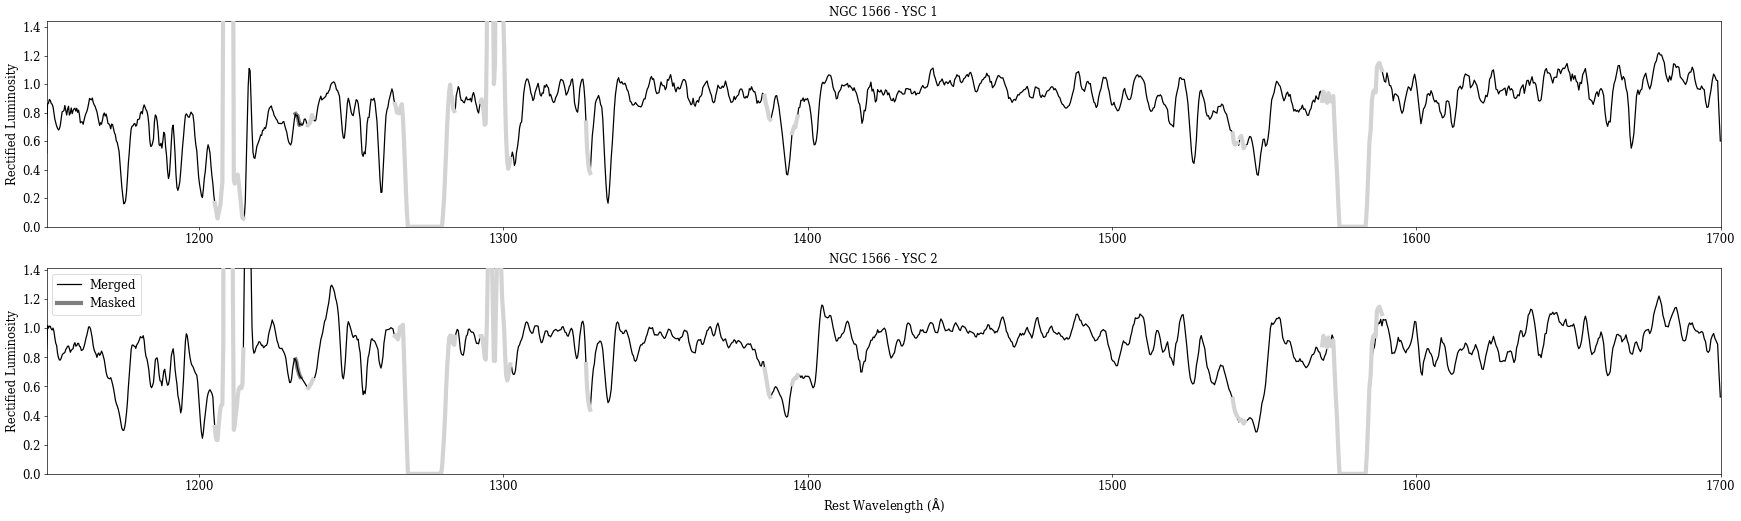

In [ ]:
!pip install astroquery
!pip install spectres
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.ned import Ned
from spectres import spectres
from matplotlib.pyplot import figure


path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

model='v94_z020_10Myr.ifaspec1'

t0 = .10000E+05

data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

result_table = Ned.query_object("NGC 1566")
z = result_table['Redshift'][0]
print('z=', z)

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1566-YSC1_G130M_normspec_wLya.dat','NGC-1566-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

#path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1566-YSC2_G130M_normspec_wLya.dat','NGC-1566-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)


y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

#print(len(x99))

# Mininum G160M wavelength with non-zero flux. 

y1_min160=min(x99[np.nonzero((x99 < 1450.) & (y1_160 > 0.))])
y2_min160=min(x99[np.nonzero((x99 < 1450.) & (y2_160 > 0.))])
#print(min160)

# Number of G160M wavelength points with non-zero fluxes

y1_n160=len(x99[np.nonzero(x99 >= y1_min160)])
y2_n160=len(x99[np.nonzero(x99 >= y2_min160)])
#print(n160)

# Maximum G130M wavelength with non-zero flux.

y1_max130=max(x99[np.nonzero((x99 < 1450.) & (y1_130 > 0.))])
y2_max130=max(x99[np.nonzero((x99 < 1450.) & (y2_130 > 0.))])
#print(max130)

# Number of G130M wavelength points with non-zero fluxes (except for segment gap)

y1_n130=len(x99[np.nonzero(x99 <= y1_max130)])
y2_n130=len(x99[np.nonzero(x99 <= y2_max130)])
#print(n130)

# Number of wavelength points in overlapping region between G130M and G160M.

y1_n_overlap=len(x99[np.nonzero((x99 >= y1_min160) & (x99 <= y1_max130))])
y2_n_overlap=len(x99[np.nonzero((x99 >= y2_min160) & (x99 <= y2_max130))])
#print(n_overlap)
#print(n130+n160-n_overlap)

# Index of G160M array where non-zero fluxes start.

y1_index_160_overlap_lo=np.where(x99==y1_min160)
y2_index_160_overlap_lo=np.where(x99==y2_min160)

# Index of G160M array where overlap region ends.

y1_index_160_overlap_hi=np.where(x99==y1_max130)
y2_index_160_overlap_hi=np.where(x99==y2_max130)

# Let y1 be the G130M + G160M spectrum of YSC1. The flux of the overlapping region 
# will be the average between the G130M and G160M fluxes. 

y1=[]
y2=[]

# We fill in the blue part of the merged array.

for i in range(y1_n130-y1_n_overlap):
    y1.append(y1_130[i])

for i in range(y2_n130-y2_n_overlap):
    y2.append(y2_130[i])

# We fill overlapping region of the merged array.

for i in range(y1_n_overlap):
    y1.append( (y1_130[y1_n130 - y1_n_overlap + i] + 
                y1_160[y1_index_160_overlap_lo[0] + i][0] ) / 2 )
    
for i in range(y2_n_overlap):
    y2.append( (y2_130[y2_n130 - y2_n_overlap + i] + 
                y2_160[y2_index_160_overlap_lo[0] + i][0] ) / 2 ) 
    
# We fill the red part of the merged array.

for i in range(y1_n160-y1_n_overlap):
    y1.append( y1_160[y1_index_160_overlap_hi[0] + i])

for i in range(y2_n160-y2_n_overlap):
    y2.append( y2_160[y2_index_160_overlap_hi[0] + i])
  
#print(len(y1))

# Smooth y1

y1s=smooth(y1,sf)
y2s=smooth(y2,sf)

# Plot result 
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

fig, axes = plt.subplots(2,figsize=(36,10), dpi=60)

axes[0].set_title('NGC 1566 - YSC 1', fontsize=size)
axes[1].set_title('NGC 1566 - YSC 2', fontsize=size)

axes[0].set_xlim(1150.,1700.)
axes[1].set_xlim(1150.,1700.)

axes[1].set_xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

good_x = np.where(x99 >= 1320) 
axes[0].set_ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))
axes[1].set_ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Set label of vertical axis
axes[0].set_ylabel('Rectified Luminosity', fontsize=size)
axes[1].set_ylabel('Rectified Luminosity', fontsize=size)

# Overlay resampled, smoothed data
#axes[0].plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[0].plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')
#axes[1].plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[1].plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Overlay merged array, smoothed
axes[0].plot(x99, y1s, color='black', label='Merged')
axes[1].plot(x99, y2s, color='black', label='Merged')

#Milky Way
mw=[1238.82, 1242.80,# N V
    1334.53,
    1393.76, 1402.77,# Si IV
    1548.19, 1550.77,# C IV
    ]
#geocoronal
geo=[1216., 
     1304.]

#--------------------------------------------------------------
# Mask positions of contaminating MW lines
for i in range(len(mw)):
    bad=np.nonzero(abs(x99 - mw[i]/(1+z)) <= 1.)
    if i==0:
        axes[0].plot(x99[bad], y1s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
        axes[1].plot(x99[bad], y2s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
    else:
        axes[0].plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
        axes[1].plot(x99[bad], y2s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)           

for i in range(len(geo)):
    bad=np.nonzero(abs(x99 - geo[i]/(1+z)) <= 5.)
    axes[0].plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
    axes[1].plot(x99[bad], y2s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 1
y1_bad=np.nonzero((x99 < 1300) & (y1s==0.))
y2_bad=np.nonzero((x99 < 1300) & (y2s==0.))
y1_ave_gap1=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y2_ave_gap1=(max(x99[y2_bad])+min(x99[y2_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap1) <= 10.)
y2_bad=np.nonzero(abs(x99 - y2_ave_gap1) <= 10.)
axes[0].plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
axes[1].plot(x99[y2_bad], y2s[y2_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 2
y1_bad=np.nonzero((x99 > 1500) & (y1s==0.))
y2_bad=np.nonzero((x99 > 1500) & (y2s==0.))
y1_ave_gap2=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y2_ave_gap2=(max(x99[y2_bad])+min(x99[y2_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap2) <= 10.)
y2_bad=np.nonzero(abs(x99 - y2_ave_gap2) <= 10.)
axes[0].plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
axes[1].plot(x99[y2_bad], y1s[y2_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
#--------------------------------------------------------------

    
# Mark positions of lines of interest
#plt.axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

# Add legend
plt.legend()

data = {'Rest Wavelength': x99,
        'Rectified Luminosity YSC1': y1s,
        'Rectified Luminosity YSC2': y2s
        }

df = pd.DataFrame(data, columns= ['Rest Wavelength', 'Rectified Luminosity YSC1', 'Rectified Luminosity YSC2'])
#df.to_csv (r'C:/home/carmenrvr/NGC_1566.txt', index = False, header=True)

print (df)

z= 0.002995

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:809: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a, v = array(a, copy=False, ndmin=1), array(v, copy=False, ndmin=1)


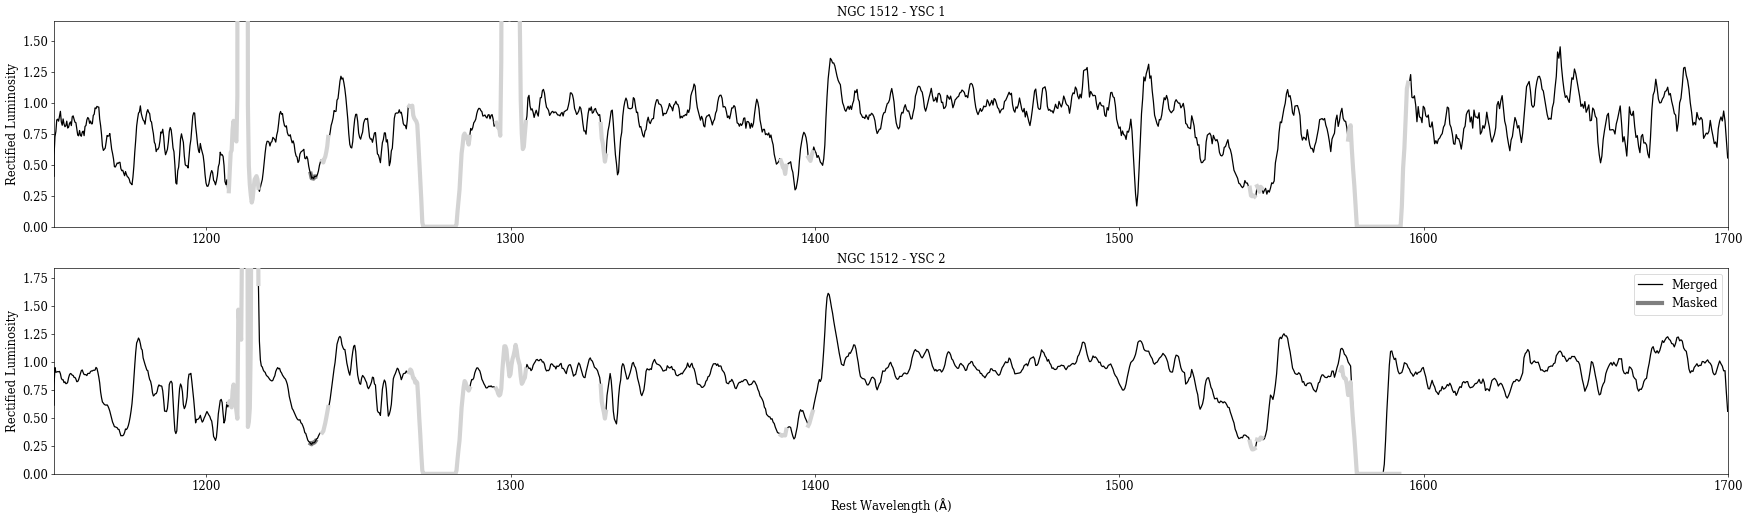

In [ ]:
!pip install astroquery
!pip install spectres
import numpy as np
import matplotlib.pyplot as plt
from astroquery.ned import Ned
from spectres import spectres
from matplotlib.pyplot import figure

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

model='v94_z020_10Myr.ifaspec1'

t0 = .10000E+05

data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

result_table = Ned.query_object("NGC 1512")
z = result_table['Redshift'][0]
print('z=', z)

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1512-YSC1_G130M_normspec_wLya.dat','NGC-1512-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

#path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1512-YSC2_G130M_normspec_wLya.dat','NGC-1512-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)


y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

#print(len(x99))

# Mininum G160M wavelength with non-zero flux. 

y1_min160=min(x99[np.nonzero((x99 < 1450.) & (y1_160 > 0.))])
y2_min160=min(x99[np.nonzero((x99 < 1450.) & (y2_160 > 0.))])
#print(min160)

# Number of G160M wavelength points with non-zero fluxes

y1_n160=len(x99[np.nonzero(x99 >= y1_min160)])
y2_n160=len(x99[np.nonzero(x99 >= y2_min160)])
#print(n160)

# Maximum G130M wavelength with non-zero flux.

y1_max130=max(x99[np.nonzero((x99 < 1450.) & (y1_130 > 0.))])
y2_max130=max(x99[np.nonzero((x99 < 1450.) & (y2_130 > 0.))])
#print(max130)

# Number of G130M wavelength points with non-zero fluxes (except for segment gap)

y1_n130=len(x99[np.nonzero(x99 <= y1_max130)])
y2_n130=len(x99[np.nonzero(x99 <= y2_max130)])
#print(n130)

# Number of wavelength points in overlapping region between G130M and G160M.

y1_n_overlap=len(x99[np.nonzero((x99 >= y1_min160) & (x99 <= y1_max130))])
y2_n_overlap=len(x99[np.nonzero((x99 >= y2_min160) & (x99 <= y2_max130))])
#print(n_overlap)
#print(n130+n160-n_overlap)

# Index of G160M array where non-zero fluxes start.

y1_index_160_overlap_lo=np.where(x99==y1_min160)
y2_index_160_overlap_lo=np.where(x99==y2_min160)

# Index of G160M array where overlap region ends.

y1_index_160_overlap_hi=np.where(x99==y1_max130)
y2_index_160_overlap_hi=np.where(x99==y2_max130)

# Let y1 be the G130M + G160M spectrum of YSC1. The flux of the overlapping region 
# will be the average between the G130M and G160M fluxes. 

y1=[]
y2=[]

# We fill in the blue part of the merged array.

for i in range(y1_n130-y1_n_overlap):
    y1.append(y1_130[i])

for i in range(y2_n130-y2_n_overlap):
    y2.append(y2_130[i])

# We fill overlapping region of the merged array.

for i in range(y1_n_overlap):
    y1.append( (y1_130[y1_n130 - y1_n_overlap + i] + 
                y1_160[y1_index_160_overlap_lo[0] + i][0] ) / 2 )
    
for i in range(y2_n_overlap):
    y2.append( (y2_130[y2_n130 - y2_n_overlap + i] + 
                y2_160[y2_index_160_overlap_lo[0] + i][0] ) / 2 ) 
    
# We fill the red part of the merged array.

for i in range(y1_n160-y1_n_overlap):
    y1.append( y1_160[y1_index_160_overlap_hi[0] + i])

for i in range(y2_n160-y2_n_overlap):
    y2.append( y2_160[y2_index_160_overlap_hi[0] + i])
  
#print(len(y1))

# Smooth y1

y1s=smooth(y1,sf)
y2s=smooth(y2,sf)

# Plot result 
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

fig, axes = plt.subplots(2,figsize=(36,10), dpi=60)

axes[0].set_title('NGC 1512 - YSC 1', fontsize=size)
axes[1].set_title('NGC 1512 - YSC 2', fontsize=size)

axes[0].set_xlim(1150.,1700.)
axes[1].set_xlim(1150.,1700.)

axes[1].set_xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

good_x = np.where(x99 >= 1320) 
axes[0].set_ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))
axes[1].set_ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Set label of vertical axis
axes[0].set_ylabel('Rectified Luminosity', fontsize=size)
axes[1].set_ylabel('Rectified Luminosity', fontsize=size)

# Overlay resampled, smoothed data
#axes[0].plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[0].plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')
#axes[1].plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[1].plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Overlay merged array, smoothed
axes[0].plot(x99, y1s, color='black', label='Merged')
axes[1].plot(x99, y2s, color='black', label='Merged')

#Milky Way
mw=[1238.82, 1242.80,# N V
    1334.53,
    1393.76, 1402.77,# Si IV
    1548.19, 1550.77,# C IV
    ]
#geocoronal
geo=[1216., 
     1304.]

#--------------------------------------------------------------
# Mask positions of contaminating MW lines
for i in range(len(mw)):
    bad=np.nonzero(abs(x99 - mw[i]/(1+z)) <= 1.)
    if i==0:
        axes[0].plot(x99[bad], y1s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
        axes[1].plot(x99[bad], y2s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
    else:
        axes[0].plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
        axes[1].plot(x99[bad], y2s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)           

for i in range(len(geo)):
    bad=np.nonzero(abs(x99 - geo[i]/(1+z)) <= 5.)
    axes[0].plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
    axes[1].plot(x99[bad], y2s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 1
y1_bad=np.nonzero((x99 < 1300) & (y1s==0.))
y2_bad=np.nonzero((x99 < 1300) & (y2s==0.))
y1_ave_gap1=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y2_ave_gap1=(max(x99[y2_bad])+min(x99[y2_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap1) <= 10.)
y2_bad=np.nonzero(abs(x99 - y2_ave_gap1) <= 10.)
axes[0].plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
axes[1].plot(x99[y2_bad], y2s[y2_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 2
y1_bad=np.nonzero((x99 > 1500) & (y1s==0.))
y2_bad=np.nonzero((x99 > 1500) & (y2s==0.))
y1_ave_gap2=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y2_ave_gap2=(max(x99[y2_bad])+min(x99[y2_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap2) <= 10.)
y2_bad=np.nonzero(abs(x99 - y2_ave_gap2) <= 10.)
axes[0].plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
axes[1].plot(x99[y2_bad], y1s[y2_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
#--------------------------------------------------------------

    
# Mark positions of lines of interest
#plt.axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

# Add legend
plt.legend()

z= 0.001534

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:809: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a, v = array(a, copy=False, ndmin=1), array(v, copy=False, ndmin=1)


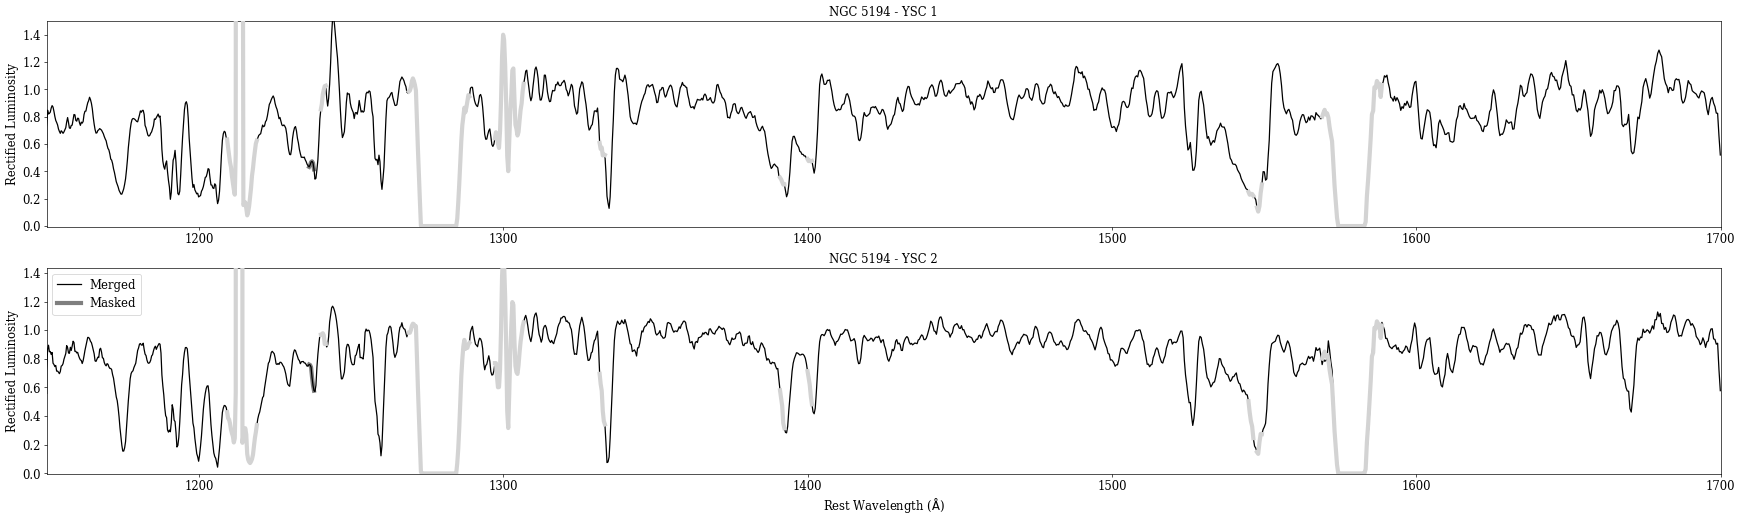

In [ ]:
!pip install astroquery
!pip install spectres
import numpy as np
import matplotlib.pyplot as plt
from astroquery.ned import Ned
from spectres import spectres
from matplotlib.pyplot import figure

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

model='v94_z020_10Myr.ifaspec1'

t0 = .10000E+05

data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

result_table = Ned.query_object("NGC 5194")
z = result_table['Redshift'][0]
print('z=', z)

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['M-51-YSC1_G130M_normspec_wLya.dat','M-51-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

#path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['M-51-YSC2_G130M_normspec_wLya.dat','M-51-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)


y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

#print(len(x99))

# Mininum G160M wavelength with non-zero flux. 

y1_min160=min(x99[np.nonzero((x99 < 1450.) & (y1_160 > 0.))])
y2_min160=min(x99[np.nonzero((x99 < 1450.) & (y2_160 > 0.))])
#print(min160)

# Number of G160M wavelength points with non-zero fluxes

y1_n160=len(x99[np.nonzero(x99 >= y1_min160)])
y2_n160=len(x99[np.nonzero(x99 >= y2_min160)])
#print(n160)

# Maximum G130M wavelength with non-zero flux.

y1_max130=max(x99[np.nonzero((x99 < 1450.) & (y1_130 > 0.))])
y2_max130=max(x99[np.nonzero((x99 < 1450.) & (y2_130 > 0.))])
#print(max130)

# Number of G130M wavelength points with non-zero fluxes (except for segment gap)

y1_n130=len(x99[np.nonzero(x99 <= y1_max130)])
y2_n130=len(x99[np.nonzero(x99 <= y2_max130)])
#print(n130)

# Number of wavelength points in overlapping region between G130M and G160M.

y1_n_overlap=len(x99[np.nonzero((x99 >= y1_min160) & (x99 <= y1_max130))])
y2_n_overlap=len(x99[np.nonzero((x99 >= y2_min160) & (x99 <= y2_max130))])
#print(n_overlap)
#print(n130+n160-n_overlap)

# Index of G160M array where non-zero fluxes start.

y1_index_160_overlap_lo=np.where(x99==y1_min160)
y2_index_160_overlap_lo=np.where(x99==y2_min160)

# Index of G160M array where overlap region ends.

y1_index_160_overlap_hi=np.where(x99==y1_max130)
y2_index_160_overlap_hi=np.where(x99==y2_max130)

# Let y1 be the G130M + G160M spectrum of YSC1. The flux of the overlapping region 
# will be the average between the G130M and G160M fluxes. 

y1=[]
y2=[]

# We fill in the blue part of the merged array.

for i in range(y1_n130-y1_n_overlap):
    y1.append(y1_130[i])

for i in range(y2_n130-y2_n_overlap):
    y2.append(y2_130[i])

# We fill overlapping region of the merged array.

for i in range(y1_n_overlap):
    y1.append( (y1_130[y1_n130 - y1_n_overlap + i] + 
                y1_160[y1_index_160_overlap_lo[0] + i][0] ) / 2 )
    
for i in range(y2_n_overlap):
    y2.append( (y2_130[y2_n130 - y2_n_overlap + i] + 
                y2_160[y2_index_160_overlap_lo[0] + i][0] ) / 2 ) 
    
# We fill the red part of the merged array.

for i in range(y1_n160-y1_n_overlap):
    y1.append( y1_160[y1_index_160_overlap_hi[0] + i])

for i in range(y2_n160-y2_n_overlap):
    y2.append( y2_160[y2_index_160_overlap_hi[0] + i])
  
#print(len(y1))

# Smooth y1

y1s=smooth(y1,sf)
y2s=smooth(y2,sf)

# Plot result 
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

fig, axes = plt.subplots(2,figsize=(36,10), dpi=60)

axes[0].set_title('NGC 5194 - YSC 1', fontsize=size)
axes[1].set_title('NGC 5194 - YSC 2', fontsize=size)

axes[0].set_xlim(1150.,1700.)
axes[1].set_xlim(1150.,1700.)

axes[1].set_xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

good_x = np.where(x99 >= 1320) 
axes[0].set_ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))
axes[1].set_ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Set label of vertical axis
axes[0].set_ylabel('Rectified Luminosity', fontsize=size)
axes[1].set_ylabel('Rectified Luminosity', fontsize=size)

# Overlay resampled, smoothed data
#axes[0].plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[0].plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')
#axes[1].plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[1].plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Overlay merged array, smoothed
axes[0].plot(x99, y1s, color='black', label='Merged')
axes[1].plot(x99, y2s, color='black', label='Merged')

#Milky Way
mw=[1238.82, 1242.80,# N V
    1334.53,
    1393.76, 1402.77,# Si IV
    1548.19, 1550.77,# C IV
    ]
#geocoronal
geo=[1216., 
     1304.]

#--------------------------------------------------------------
# Mask positions of contaminating MW lines
for i in range(len(mw)):
    bad=np.nonzero(abs(x99 - mw[i]/(1+z)) <= 1.)
    if i==0:
        axes[0].plot(x99[bad], y1s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
        axes[1].plot(x99[bad], y2s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
    else:
        axes[0].plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
        axes[1].plot(x99[bad], y2s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)           

for i in range(len(geo)):
    bad=np.nonzero(abs(x99 - geo[i]/(1+z)) <= 5.)
    axes[0].plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
    axes[1].plot(x99[bad], y2s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 1
y1_bad=np.nonzero((x99 < 1300) & (y1s==0.))
y2_bad=np.nonzero((x99 < 1300) & (y2s==0.))
y1_ave_gap1=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y2_ave_gap1=(max(x99[y2_bad])+min(x99[y2_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap1) <= 10.)
y2_bad=np.nonzero(abs(x99 - y2_ave_gap1) <= 10.)
axes[0].plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
axes[1].plot(x99[y2_bad], y2s[y2_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 2
y1_bad=np.nonzero((x99 > 1500) & (y1s==0.))
y2_bad=np.nonzero((x99 > 1500) & (y2s==0.))
y1_ave_gap2=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y2_ave_gap2=(max(x99[y2_bad])+min(x99[y2_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap2) <= 10.)
y2_bad=np.nonzero(abs(x99 - y2_ave_gap2) <= 10.)
axes[0].plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
axes[1].plot(x99[y2_bad], y1s[y2_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
#--------------------------------------------------------------

    
# Mark positions of lines of interest
#plt.axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

# Add legend
plt.legend()

z= 0.002598

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:809: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a, v = array(a, copy=False, ndmin=1), array(v, copy=False, ndmin=1)


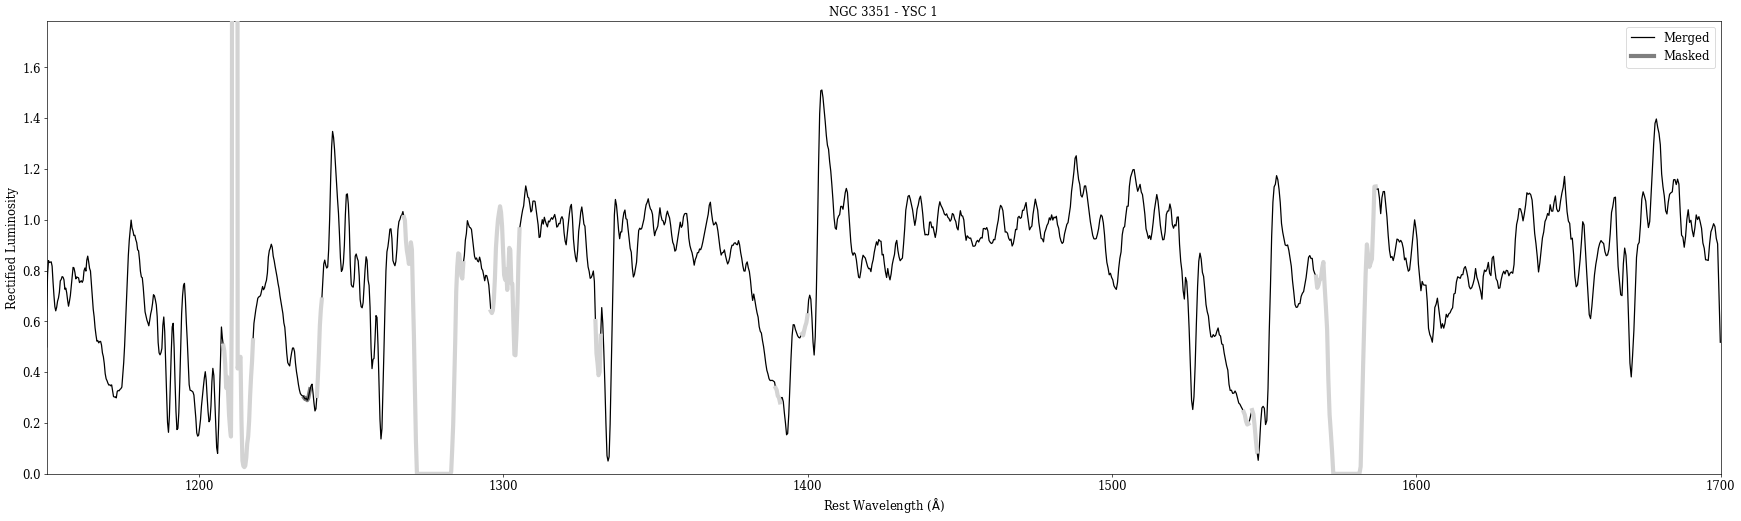

In [ ]:
!pip install astroquery
!pip install spectres
import numpy as np
import matplotlib.pyplot as plt
from astroquery.ned import Ned
from spectres import spectres
from matplotlib.pyplot import figure

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

model='v94_z020_10Myr.ifaspec1'

t0 = .10000E+05

data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

result_table = Ned.query_object("NGC 3351")
z = result_table['Redshift'][0]
print('z=', z)

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['M-95-YSC1_G130M_normspec_wLya.dat','M-95-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)


y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

sf = 5

y1_130s = smooth(y1_130, sf)
y1_160s = smooth(y1_160, sf)


# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

#print(len(x99))

# Mininum G160M wavelength with non-zero flux. 

y1_min160=min(x99[np.nonzero((x99 < 1450.) & (y1_160 > 0.))])
#print(min160)

# Number of G160M wavelength points with non-zero fluxes

y1_n160=len(x99[np.nonzero(x99 >= y1_min160)])
#print(n160)

# Maximum G130M wavelength with non-zero flux.

y1_max130=max(x99[np.nonzero((x99 < 1450.) & (y1_130 > 0.))])
#print(max130)

# Number of G130M wavelength points with non-zero fluxes (except for segment gap)

y1_n130=len(x99[np.nonzero(x99 <= y1_max130)])
#print(n130)

# Number of wavelength points in overlapping region between G130M and G160M.

y1_n_overlap=len(x99[np.nonzero((x99 >= y1_min160) & (x99 <= y1_max130))])
#print(n_overlap)
#print(n130+n160-n_overlap)

# Index of G160M array where non-zero fluxes start.

y1_index_160_overlap_lo=np.where(x99==y1_min160)

# Index of G160M array where overlap region ends.

y1_index_160_overlap_hi=np.where(x99==y1_max130)

# Let y1 be the G130M + G160M spectrum of YSC1. The flux of the overlapping region 
# will be the average between the G130M and G160M fluxes. 

y1=[]

# We fill in the blue part of the merged array.

for i in range(y1_n130-y1_n_overlap):
    y1.append(y1_130[i])

# We fill overlapping region of the merged array.

for i in range(y1_n_overlap):
    y1.append( (y1_130[y1_n130 - y1_n_overlap + i] + 
                y1_160[y1_index_160_overlap_lo[0] + i][0] ) / 2 )
    
# We fill the red part of the merged array.

for i in range(y1_n160-y1_n_overlap):
    y1.append( y1_160[y1_index_160_overlap_hi[0] + i])


# Smooth y1

y1s=smooth(y1,sf)

# Plot result 
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

fig, axes = plt.subplots(figsize=(36,10), dpi=60)

plt.title('NGC 3351 - YSC 1', fontsize=size)

plt.xlim(1150.,1700.)


plt.xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

good_x = np.where(x99 >= 1320) 
plt.ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))

# Set label of vertical axis
plt.ylabel('Rectified Luminosity', fontsize=size)

# Overlay resampled, smoothed data
#axes[0].plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
#axes[0].plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')

# Overlay merged array, smoothed
plt.plot(x99, y1s, color='black', label='Merged')

#Milky Way
mw=[1238.82, 1242.80,# N V
    1334.53,
    1393.76, 1402.77,# Si IV
    1548.19, 1550.77,# C IV
    ]
#geocoronal
geo=[1216., 
     1304.]

#--------------------------------------------------------------
# Mask positions of contaminating MW lines
for i in range(len(mw)):
    bad=np.nonzero(abs(x99 - mw[i]/(1+z)) <= 1.)
    if i==0:
        plt.plot(x99[bad], y1s[bad], color='black', linewidth='5', alpha=0.5, 
         zorder=10, label='Masked')
    else:
        plt.plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)         

for i in range(len(geo)):
    bad=np.nonzero(abs(x99 - geo[i]/(1+z)) <= 5.)
    plt.plot(x99[bad], y1s[bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 1
y1_bad=np.nonzero((x99 < 1300) & (y1s==0.))

y1_ave_gap1=(max(x99[y1_bad])+min(x99[y1_bad]))/2

y1_bad=np.nonzero(abs(x99 - y1_ave_gap1) <= 10.)

plt.plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)

#Segment gap 2
y1_bad=np.nonzero((x99 > 1500) & (y1s==0.))
y1_ave_gap2=(max(x99[y1_bad])+min(x99[y1_bad]))/2
y1_bad=np.nonzero(abs(x99 - y1_ave_gap2) <= 10.)
plt.plot(x99[y1_bad], y1s[y1_bad], color='lightgrey', linewidth='5', alpha=1, 
         zorder=10)
#--------------------------------------------------------------

    
# Mark positions of lines of interest
#plt.axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
#plt.axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

# Add legend
plt.legend()